In [2]:
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt
import seaborn as sns     
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv("BMW SALES.csv")

In [4]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
df.shape

(50000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [8]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    50000
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022'),
  Text(13, 0, '2023'),
  Text(14, 0, '2024')])

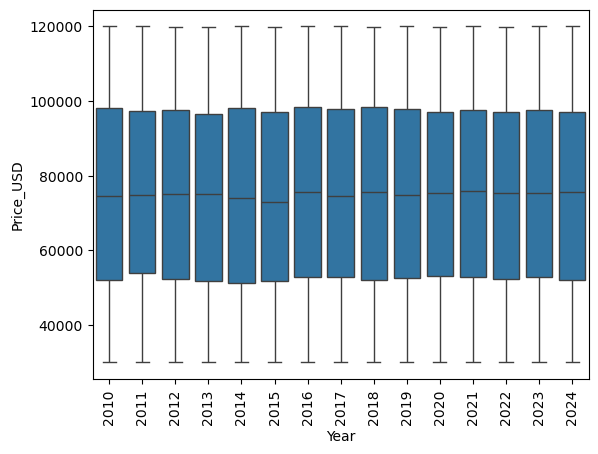

In [10]:
sns.boxplot(x=df['Year'],y=df['Price_USD'])
plt.xticks(rotation=90)

In [11]:
df['Age'] = 2025 - df['Year']                    # Newer cars more expensive
df['Price_per_KM'] = df['Price_USD'] / (df['Mileage_KM'] + 1)
df['Engine_Power_Ratio'] = df['Engine_Size_L'] / (df['Mileage_KM'] + 1)
df['Volume_per_Price'] = df['Sales_Volume'] / (df['Price_USD'] + 1)


<Axes: >

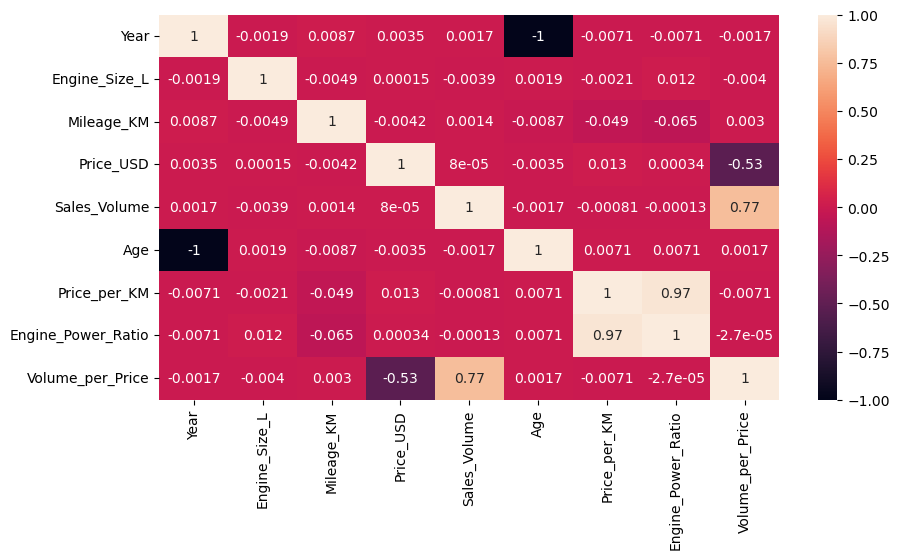

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [13]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Age,Price_per_KM,Engine_Power_Ratio,Volume_per_Price
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9,0.650680,0.000023,0.084058
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12,0.651087,0.000013,0.043272
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3,10.304312,0.000409,0.061748
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1,2.236975,0.000062,0.066375
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,0.408558,0.000017,0.061725


In [14]:
cat_columns=['Model','Region','Color','Fuel_Type','Transmission','Sales_Classification']
num_columns=['Year','Engine_Size_L','Mileage_KM','Sales_Volume','Age','Price_per_KM','Engine_Power_Ratio','Volume_per_Price']

In [15]:
df_encoded=pd.get_dummies(df,columns=cat_columns,drop_first=True)

In [16]:
X=df_encoded.drop('Price_USD',axis=1)
y=df_encoded['Price_USD']

In [17]:
X

,Year,Engine_Size_L,Mileage_KM,Sales_Volume,Age,Price_per_KM,Engine_Power_Ratio,Volume_per_Price,Model_5 Series,Model_7 Series,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,2016,3.5,151748,8300,9,0.650680,0.000023,0.084058,True,False,...,False,False,True,False,False,False,False,True,True,False
1,2013,1.6,121671,3428,12,0.651087,0.000013,0.043272,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2022,4.5,10991,6994,3,10.304312,0.000409,0.061748,True,False,...,True,False,False,False,False,False,False,True,False,True
3,2024,1.7,27255,4047,1,2.236975,0.000062,0.066375,False,False,...,True,False,False,False,False,False,False,True,False,True
4,2020,2.1,122131,3080,5,0.408558,0.000017,0.061725,False,True,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014,4.6,151030,8182,11,0.284260,0.000030,0.190576,False,False,...,False,False,True,False,False,False,True,False,True,False
49996,2023,4.2,147396,9816,2,0.330495,0.000028,0.201499,False,False,...,False,False,False,True,False,True,False,False,True,False
49997,2010,4.5,174939,8280,15,0.263668,0.000026,0.179504,True,False,...,False,False,True,False,False,False,False,True,False,False
49998,2020,3.8,3379,9486,5,17.327219,0.001124,0.161968,False,False,...,False,False,False,False,True,True,False,False,False,False


In [18]:
y

0         98740
1         79219
2        113265
3         60971
4         49898
          ...  
49995     42932
49996     48714
49997     46126
49998     58566
49999     77492
Name: Price_USD, Length: 50000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Year,Engine_Size_L,Mileage_KM,Sales_Volume,Age,Price_per_KM,Engine_Power_Ratio,Volume_per_Price,Model_5 Series,Model_7 Series,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,-0.234876,0.250548,0.887814,1.131530,0.234876,-0.029421,-0.040300,0.104077,3.144599,-0.320819,...,-0.444915,-0.447686,2.215417,-0.447750,-0.446269,-0.576457,-0.584002,1.727444,0.993859,-1.509817
1,-0.928611,-1.632377,0.368717,-0.573911,0.928611,-0.029417,-0.043077,-0.603344,-0.318006,-0.320819,...,-0.444915,-0.447686,2.215417,-0.447750,-0.446269,-0.576457,1.712324,-0.578890,-1.006179,0.662332
2,1.152595,1.241561,-1.541504,0.674365,-1.152595,0.056961,0.067934,-0.282877,3.144599,-0.320819,...,2.247622,-0.447686,-0.451382,-0.447750,-0.446269,-0.576457,-0.584002,1.727444,-1.006179,0.662332
3,1.615085,-1.533276,-1.260805,-0.357231,-1.615085,-0.015226,-0.029287,-0.202636,-0.318006,-0.320819,...,2.247622,-0.447686,-0.451382,-0.447750,-0.446269,-0.576457,-0.584002,1.727444,-1.006179,0.662332
4,0.690105,-1.136871,0.376656,-0.695729,-0.690105,-0.031587,-0.041944,-0.283289,-0.318006,3.117020,...,-0.444915,-0.447686,-0.451382,-0.447750,-0.446269,-0.576457,-0.584002,-0.578890,0.993859,0.662332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.697366,1.340662,0.875423,1.090224,0.697366,-0.032699,-0.038228,1.951575,-0.318006,-0.320819,...,-0.444915,-0.447686,2.215417,-0.447750,-0.446269,-0.576457,1.712324,-0.578890,0.993859,-1.509817
49996,1.383840,0.944257,0.812704,1.662205,-1.383840,-0.032286,-0.038778,2.141021,-0.318006,-0.320819,...,-0.444915,-0.447686,-0.451382,2.233388,-0.446269,1.734734,-0.584002,-0.578890,0.993859,-1.509817
49997,-1.622346,1.241561,1.288067,1.124529,1.622346,-0.032884,-0.039555,1.759544,3.144599,-0.320819,...,-0.444915,-0.447686,2.215417,-0.447750,-0.446269,-0.576457,-0.584002,1.727444,-1.006179,-1.509817
49998,0.690105,0.547852,-1.672880,1.546689,-0.690105,0.119802,0.268215,1.455389,-0.318006,-0.320819,...,-0.444915,-0.447686,-0.451382,-0.447750,2.240802,1.734734,-0.584002,-0.578890,-1.006179,-1.509817


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from xgboost import XGBRegressor
model=XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=6)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_sc=r2_score(y_test,y_pred)

In [25]:
r2_sc

0.9979740381240845

In [51]:
import joblib
joblib.dump(model, "xgb_model.pkl")


['xgb_model.pkl']